# Linear Regression实践
基于Pytorch框架，运用梯度下降法更新参数，得到一个线性回归模型$y = wx + b$

In [1]:
import torch
import torch.nn as nn
import numpy as np
import torch.utils.data as data
import matplotlib.pyplot as plt

In [2]:
# 定义一系列的超参数
NUM_INPUT = 2     # 输入样本的维度
NUM_SAMPLE = 1000 # 样本的数量
BATCH_SIZE = 10   # batch size
W = [1, 2]        # 真实的参数
B = 3             # 真实的偏置
EPOCH = 5         # 训练迭代轮数

In [3]:
# 根据上一单元格设定的一些超参数，生成训练样本
features = torch.randn(NUM_SAMPLE, NUM_INPUT, dtype=torch.float)
arg_w = torch.tensor(W, dtype=torch.float).view(2, 1)
labels = features.mm(arg_w) + B
labels += torch.tensor(np.random.normal(0, 0.005, size=labels.size()), dtype=torch.float)

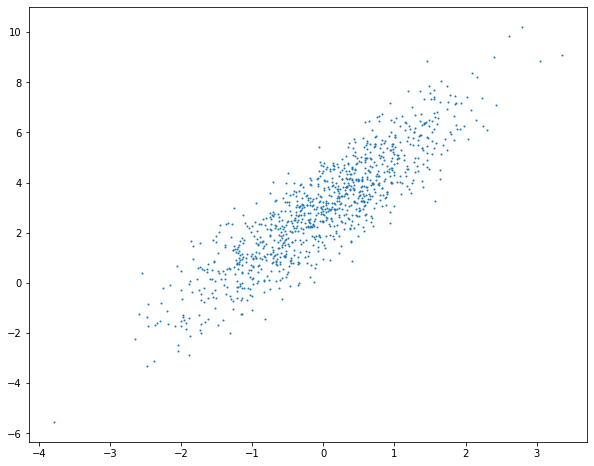

In [4]:
# 我们可以看一下输入的第二个维度与对应值得线性关系
plt.figure(figsize=(10, 8))
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)
plt.show()

In [5]:
# 根据生成的数据制作可迭代的的批数据集
dataset = data.TensorDataset(features, labels)
data_iter = data.DataLoader(dataset, BATCH_SIZE, shuffle=True)

In [6]:
# 定义线性回归模型
class LinearNet(nn.Module):
    def __init__(self, num_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(num_feature, 1)
        nn.init.normal_(self.linear.weight, mean=0, std=0.01)
        nn.init.constant_(self.linear.bias, val=0)
        
    def forward(self, x):
        return self.linear(x)

model = LinearNet(NUM_INPUT)
print(model)

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [7]:
# 使用MSE做为损失函数
loss = nn.MSELoss()
# 使用SGD作为优化器
optimizer = torch.optim.SGD(model.parameters(), lr = 0.005)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.005
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [8]:
for epoch in range(EPOCH):
    for x, y in data_iter:
        output = model(x)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print("epoch {}, loss: {}".format(epoch, l.item()))

epoch 0, loss: 1.7541488409042358
epoch 1, loss: 0.29283028841018677
epoch 2, loss: 0.02803996205329895
epoch 3, loss: 0.002806972712278366
epoch 4, loss: 0.0016372613608837128


In [9]:
print("model weight: {}, bias: {}".format(model.linear.weight.detach().numpy(),
                                          model.linear.bias.detach().numpy()))

model weight: [[0.9885632 1.9799343]], bias: [2.977579]
